# Graph Tutoriel

Ceci est un tutoriel inspiré de l'["Initiation à la théorie des graphes" de Christian Roux, coll.Ellipses, 2009](http://www.sudoc.abes.fr/DB=2.1/SRCH?IKT=12&TRM=131948466)
qui présente les principaux points mathématique de la théorie des graphes.

Nous ajoutons ici une illustration pratique à travers sur son utilisation en Python
Nous utiliserons la librairie [Networkx](https://networkx.github.io/documentation/latest/reference/citing.html).


## Introduction 
mixte à la théorie des graphes et à la construction de grapĥ en python


## Quelques définitions théoriques
Un **graphe** est un ensemble de points reliés par des segments.

Les points sont appelés **sommets** ou **noeuds** du graphe. Nous les appelerons ici et tout au long de ce tutoriel les **noeuds** (nodes). 

Les segments sont les **arêtes** ou les liens du graphe (edge). Nous les appelerons liens ou arêtes tout au long du tutoriel bien que ce ne soit pas la dénomination mathématiques

Les somments situés à chaque bout sont les **extrémités** de l'arête.

    

![Graph simple](./simple_graph.png)

## Creation d'un graphe en python
Tutoriel inspiré de https://networkx.github.io/documentation/latest/tutorial/tutorial.html

In [55]:
#importer les libraires
#pour afficher
import matplotlib.pyplot as plt
#pour le calcul
import numpy as np
#pour le réseau
import networkx as nx
%matplotlib inline


In [56]:
#instancier le graph
g = nx.Graph()
#ajouter un noeud
#g.add_node("paul")
#ajouter une liste de noeud
g.add_nodes_from(["paul", "matthieu", "jean", "luc", "marc"])

In [57]:
#ajouter un lien (edge)
#g.add_edge("paul","matthieu")
#ajouter une liste de liens (edges)
g.add_edges_from([("paul", "matthieu"), ("matthieu", "jean"),("jean", "marc"), ("marc", "luc"), ("luc", "matthieu")])

In [58]:
#Combien de noeuds?
print "Ce graphe compte", g.number_of_nodes(), "noeuds:"
print(g.nodes())
#Combiens de liens?
print "Ce graphe compte", g.number_of_edges(), "liens"
print(g.edges())

Ce graphe compte 5 noeuds:
['jean', 'paul', 'luc', 'matthieu', 'marc']
Ce graphe compte 5 liens
[('jean', 'matthieu'), ('jean', 'marc'), ('paul', 'matthieu'), ('luc', 'matthieu'), ('luc', 'marc')]


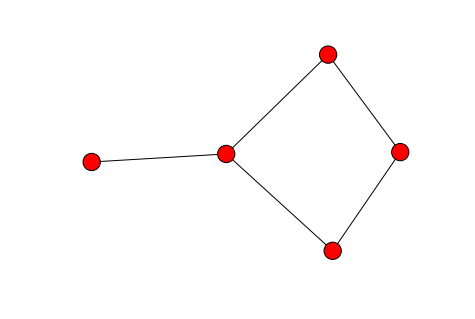

In [59]:
#Affichons ce graphe
#un simple graph
nx.draw(g)
plt.savefig("graphe_apotres.png") # save as png
plt.show() # display

    La position des sommets et des arêtes n'a pas d'importance d'un point de vue mathématiques. 
    Il s'agit d'une simple représentation graphique qui positionne les points de manière aléatoire.
    Vous pouvez tester en relancant le blocx de code ci dessus: l'aspect du graphe peut changer.
    
    

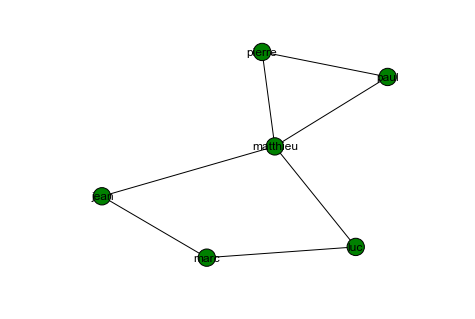

In [97]:
#Ajoutons un noeud
g.add_node("pierre", name="pierre")
#et ses relations
g.add_edges_from([("pierre", "matthieu"), ("paul", "pierre")])
#On peut enlever des noeuds ou détruire des liens de la même ma,ière que lorsqu'on les ajoute
#g.remove_node("jean")
#print(g.remove_nodes_from([])

#si le positionnement est aléatoire en mathématique en python 
#il faut définir l'agencement du graphe
#par défault networkx propose spring_layout
# nous verrons par la suite les agencements (layout) proposés
pos=nx.spring_layout(g)
#ici nous ajoutons une couleur et un label aux noeuds

nx.draw(g,pos, node_color="g",with_labels=True)
plt.savefig("graphe_example.png")

### Matrices
On peut rassembler les données du graphe dans un tableau, une **matrice**. 

De même qu'une matrice peut se représenter sous forme d'un graphe  que nous verrons plus loin

Ici nous avons nommé les noeuds pour plus de clareté. 

Nous allons maintenant représenter ce graphe sous forme de tableau ou de matrice où
* 1 représente la présence d'un lien entre deux noeuds 
* et 0 l'absence de lien entre les deux noeuds


|         | Marc  	| Pierre  	|  Matthieu |  Luc 	|  Jean | Paul |
|:-:	  |--	    |---	    |---	    |---	|---	|---   |
|Marc     |   0     |   0  	    |   0       |1      |1      |  0   |
|Pierre   |   0	    |   0 	    |   1  	    |   0	|   0   |  1   |
|Matthieu |   0	    |   1	    |   0	    |   1	|   1   |  1   |
|Luc      |   1	    |   0       |   1	    |   0   |   0   |  0   |
|Jean     |   1  	|   0   	|   1	    |   0	|   0	|  0   |
|Paul     |   0	    |   1	    |   1	    |   0	|   0	|   0  |  

Regardons maintenant comment produire ce même tableau en Python

Nous avons en effet déjà dans notre graphe la liste des noeuds, et la liste des liens.
Il suffit simplement de lister tous les couples de noeuds unique possible
et de détecter les liens qui existent déjà. 

Le nombre de liens possibles entre les noeuds peut ici se calculer facilement, 
Il s'agit d'une opération d'algébre combinatoire 

qu'on appelle un [coefficient binominal](https://fr.wikipedia.org/wiki/Coefficient_binomial)

Cela consiste à calculer dans une liste d'élement *k* le nombre de combinaison *n*.

Soit en une barbare notation mathématique:
calculer la factorielle de n sur la factorielle de n multipliée par la factorielle de n mois k



In [98]:
%%latex

$C_n^k = \frac{!n}{ n!(n-k)!}$ 

<IPython.core.display.Latex object>

* Pour les curieux voir l'[explication](https://fr.wikipedia.org/wiki/Coefficient_binomial#.C3.89tablissement_de_la_formule)

Et en python, cela donne:

In [99]:
def combo_score(n,k):
    from math import factorial as fact
    #en combinatoire calculer le nombre de combinaison de 2 elements sur un ensemble de 482 elements
    #https://fr.wikipedia.org/wiki/Combinaison_(math%C3%A9matiques)
    #combin = lambda n,k: fact(n)//(fact(k)*fact(n-k))
    return fact(n)/(fact(k)*fact(n-k))

En python, les combinaisons sont générés grace à la fonction **combinations** disponible dans le module itertools

Combinations produit un nombre ***n*** de combinaisons d'élement a partir d'une liste ***k***

Par exemple: la combinaison de 2 elements pour la liste ["A", "B", "C"]
nous donnera: [("A","B"), ("B","C"), ("A", "C")]

``` python
    >>> from itertools import combinations
    >>> n = 2
    >>> k  = ["A", "B", "C"]
    #il s'agit d'un itérateur 
    #donc pour afficher nous devons la liste
    >>> print [n for n in combinations(n, k)]
    >>> [(A,B), (B,C), (A, C)]
```

et non pas une  liste de combinaison possible avec permutations telle que:

```[(A,B), (B,C), (C,A), (B,A), (C,B), (A,C)]```

Nous avons besoin ici de la liste des couples uniques pour les 6 noeuds soit la combinatoire de 2 sur 6 elements
    
        cela consiste à lister les valeurs du tableau en prenant chaque entrée de ligne 
        en couplant avec chaque colonne

In [100]:
from itertools import combinations
matrix = [n for n in combinations(g.nodes(),2)]

print len(matrix), "liens possibles"
for n in matrix:
    print "-", n[0],"&",n[1]


15 liens possibles
- marc & pierre
- marc & matthieu
- marc & luc
- marc & jean
- marc & paul
- pierre & matthieu
- pierre & luc
- pierre & jean
- pierre & paul
- matthieu & luc
- matthieu & jean
- matthieu & paul
- luc & jean
- luc & paul
- jean & paul


Maintenant pour reproduire le tableau, nous allons 
    pour chaque couple de noeud (un lien possible)
        verifier qu'il existe dans les liens (edges):
            * s'il existe on lui ajoute 1
            * sinon on ajoute 0
Et produire ainsi une liste avec trois entrées: le noeudA, le noeudB, et la liaison

In [101]:
matrix_0 = []
for n in matrix:
    if n in g.edges():
        matrix_0.append(n + (1,))
    else:
        matrix_0.append(n + (0,))

print matrix_0

[('marc', 'pierre', 0), ('marc', 'matthieu', 0), ('marc', 'luc', 1), ('marc', 'jean', 1), ('marc', 'paul', 0), ('pierre', 'matthieu', 1), ('pierre', 'luc', 0), ('pierre', 'jean', 0), ('pierre', 'paul', 1), ('matthieu', 'luc', 1), ('matthieu', 'jean', 1), ('matthieu', 'paul', 1), ('luc', 'jean', 0), ('luc', 'paul', 0), ('jean', 'paul', 0)]


On reproduit le tableau par colonne de deux en affichant le tableau

In [102]:
print "---------------------------------------"
print "\t|\t".join(["Noeud", "Noeud", "Relié?"])

for n in matrix_0:
    print "---------------------------------------"
    print "\t|\t".join([str(i) for i in n])
    

---------------------------------------
Noeud	|	Noeud	|	Relié?
---------------------------------------
marc	|	pierre	|	0
---------------------------------------
marc	|	matthieu	|	0
---------------------------------------
marc	|	luc	|	1
---------------------------------------
marc	|	jean	|	1
---------------------------------------
marc	|	paul	|	0
---------------------------------------
pierre	|	matthieu	|	1
---------------------------------------
pierre	|	luc	|	0
---------------------------------------
pierre	|	jean	|	0
---------------------------------------
pierre	|	paul	|	1
---------------------------------------
matthieu	|	luc	|	1
---------------------------------------
matthieu	|	jean	|	1
---------------------------------------
matthieu	|	paul	|	1
---------------------------------------
luc	|	jean	|	0
---------------------------------------
luc	|	paul	|	0
---------------------------------------
jean	|	paul	|	0


    ! Nous n'avons ici la même représentation de l'information. 
    Dans le premier tableau l'information est représentée 
    sous forme d'une matrice à 3 dimensions et 6x 6 entrées
    La liaison entre marc et marc est représentée.
    Tandis que dans le deuxième tableau nous représentons l'information
    en examinant toutes les relations uniques
    soit on enlève 6 couples 6 x 6 = 36 - 6 = 30 entrées soit 15 liens possibles
    
    
|         | Marc  	| Pierre  	|  Matthieu |  Luc 	|  Jean | Paul |
|:-:	  |--	    |---	    |---	    |---	|---	|---   |
|Marc     |   **X**     |   0  	    |   0       |1      |1      |  0   |
|Pierre   |   0	    |   **X** 	    |   1  	    |   0	|   0   |  1   |
|Matthieu |   0	    |   1	    |   **X**	    |   1	|   1   |  1   |
|Luc      |   1	    |   0       |   1	    |   **X**   |   0   |  0   |
|Jean     |   1  	|   0   	|   1	    |   0	|   **X**	|  0   |
|Paul     |   0	    |   1	    |   1	    |   0	|   0	|   **X**  |  
    
   Mais sur les représentations des matrices, nous verrons cela plus en détail prochainement 

## Ordre, Degré, Voisinage


* L’**ordre** d’un graphe est le nombre de sommets de ce graphe.
* Dans un graphe, le [**degré**](https://fr.wikipedia.org/wiki/Degr%C3%A9_(th%C3%A9orie_des_graphes) de chaque sommet est le nombre de liens (arêtes) dont il est l’une des extrémités. 
    
        Pour caractériser le graphe on évalue son degré maximal et son degré minimal
        Lorsque le degré maximal et le degré minimal sont les mêmes on parle de graphe régulier
* Quand deux noeuds sont reliés par un lien (une arête) on dit qu'ils sont **adjacents** (ou voisins)
* La somme des degrés des sommets est égale au double du nombre de liens (arêtes).


    => Quels sont les sommets du graphe?

In [109]:
sommets = g.nodes()

print sommets

['marc', 'pierre', 'matthieu', 'luc', 'jean', 'paul']


    => Quel est l'ordre de ce grapĥe?

In [112]:
print g.number_of_nodes()

6


    => Pour chaque sommet: lister ses voisins et donner son degré

In [113]:
for n in g.nodes():
    print "---"
    print "\t-", n, "a pour noeuds adjacents:",g.neighbors(n)
    print "\t-", n,"est un sommet de degré", len(g.neighbors(n))
    


---
	- marc a pour noeuds adjacents: ['jean', 'luc']
	- marc est un sommet de degré 2
---
	- pierre a pour noeuds adjacents: ['paul', 'matthieu']
	- pierre est un sommet de degré 2
---
	- matthieu a pour noeuds adjacents: ['paul', 'luc', 'jean', 'pierre']
	- matthieu est un sommet de degré 4
---
	- luc a pour noeuds adjacents: ['matthieu', 'marc']
	- luc est un sommet de degré 2
---
	- jean a pour noeuds adjacents: ['matthieu', 'marc']
	- jean est un sommet de degré 2
---
	- paul a pour noeuds adjacents: ['matthieu', 'pierre']
	- paul est un sommet de degré 2


    ==> Quel sont le degré maximal et minimal de ce graphe?

In [ ]:
nb_sommets = g.number_of_nodes()
print "Ce graphe est d'ordre", nb_sommets
#calculer le nombre de liens pour chaque noeud
degrees = [len(g.neighbors(n)) for n in g.nodes())]
max_degree = max(degrees)
min_degree = min(degrees)
print "- son degré maximal est de :", max_degree
print "- son degré minimal est de :", min_degree

    => Créer une fonction qui définit s'il s'agit d'un graphe régulier:

In [118]:
def is_regular_graph(g):
    degrees = [len(g.neighbors(n)) for n in g.nodes()]
    return bool(max(degrees) ==min(degrees))

print "Ce graph est il regulier?", is_regular_graph(g)

Ce graph est il regulier? False


    => Quelle est la somme des degrés de ce graphe?

In [114]:
sum_degree = len(g.edges()) *2
print "Ce graphe a donc %i arêtes" %sum_degree

Ce graphe a donc 14 arêtes


### Chaîne, cycle et parcours de graphe

* Un **chaine** est une suite quelconque d'arêtes et donc de sommets adjacents. 
        
           Une chaîne reproduit le parcours du graphe en partant d'un noeud sous forme de pas ou de parcours
           Un parcours de graphe est alors l'algorithme consistant à explorer les sommets d'un graphe de proche
           en proche à partir d'un sommet initial et de définir une chaîne.

* Un **cycle** est une chaine dont l'origine et l'extrémité sont confondues, à condition que toutes les arêtes soient différentes, il peut contenir parfois le même sommet.
      
          Un cycle est un parcours entre un point A et un point B et qui emprunte un chemin unique: 
          il passe toujours par un lien (une arête) différent.
* On parle de **chaine fermée** quand les arêtes ne sont  pas toujours distinctes
        
        Une chaine fermée est donc une chaine  qui repasse par des liens déjà emprunté.



Reprenons notre graphe 
![graphe d'example](./graphe_example.png)

=> Quel est le cycle le plus long de ce graphe?
=> Combien y a t-il de cycles fermés?

#### Parcours de graphe
Pour lister tous les parcours possibles de ce graphe il fait prendre en compte que
    - il y a autant de chaines que de liens (arêtes ou edges) d'un noeud à l'autre
    - on ne doit pas repasser par un meme noeud, ni retourner sur nos pas et s'arreter à un moment précis
    pour cela il convient de définir:
        * la **source** ou point de départ
        * la **cible** ou point d'arrivée
        * Le nombre maximal de **pas**
Dans le cas d'un cycle donc la source et la cible sont les mêmes

Une implémentation naïve consisterait à lister tous les noeuds:
puis à lister les voisins et lister ensuite les voisins des voisins et ainsi de suite 
jusqu'à la distance maximale
soit n => n1 => n2 => n3 => n4 => n5 => n...
mais il faut prendre garde à chaque étape que chaque noeud est bien unique
et si le noeud est egal à l'un des noeuds de la liste arreter le parcours
et ce n'est pas si simple... Je vous propose d'essayer de l'implémenter

Sinon networkx nous propose plusieurs algorithmes de parcours de graphe
Nous verrons dans le détail les parcours de graphes un peu plus loin


In [143]:
#Les parcours possibles sans repasser par le même noeud depuis "paul" jusqu'à "luc"
print "parcours de Paul à Luc:"
for path in nx.all_simple_paths(g, "paul", "luc"):
    print "==>".join(path)
#Tous les cycles possibles sans repasser par le même noeud depuis "paul" jusqu'à "paul"
#la limite de recherche correspond au degré maximal du graph
print "\nparcours de Paul à Paul:"
for path in nx.all_simple_paths(g, "paul", "paul", 6):
    print "==>".join(path)

parcours de Paul à Luc:
paul==>matthieu==>luc
paul==>matthieu==>jean==>marc==>luc
paul==>pierre==>matthieu==>luc
paul==>pierre==>matthieu==>jean==>marc==>luc

parcours de Paul à Paul:
paul==>matthieu==>paul
paul==>matthieu==>pierre==>paul
paul==>pierre==>paul
paul==>pierre==>matthieu==>paul


In [ ]:
### Les types de graphes

* Un graphe est **complet** lorsque deux sommets différents quelconques sont toujours adjacents
    Un graphe complet est donc un graphe dont tous les sommets sont reliés entre eux au niveau 1
    Autrement dit tous les liens entre les noeuds existent
On peut le créer programmatiquement avec ce qu'on a déjà vu

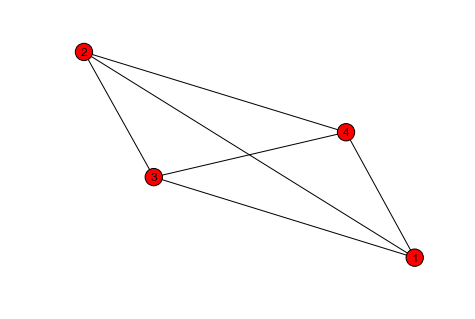

In [166]:
graphe_complet = nx.Graph()

graphe_complet.add_nodes_from([1, 2, 3, 4])
edges = combinations(graphe_complet.nodes(), 2)
#et ses relations
graphe_complet.add_edges_from(edges)
nx.draw(graphe_complet, with_labels = True)
plt.savefig("graphe_complet1.png") # save as png
plt.show() # display

In [ ]:
 * Un graphe est **connexe** lorsque quels que soient les sommets *i* et *j* considérés, il existe 
toujours une chaine reliant *i* et *j*
    Lorsque qu'on examine deux sommets d'un graphe le graphe est connexe n'importe lequel des sommets est relié 
    par une chaine: il n'y a pas de noeud isolé

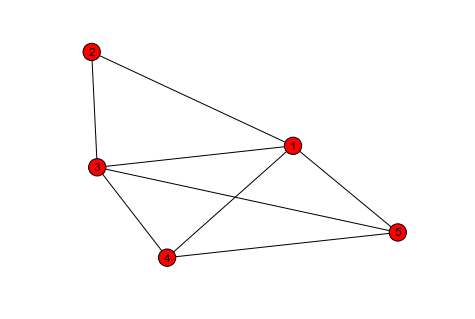

In [168]:
graphe_connexe = nx.Graph()

graphe_connexe.add_nodes_from([1, 2, 3, 4, 5])
edges = [(1,2), (1,3), (1,4), (1,5), (2,3), (3,5), (3,4), (4,5)]

#et ses relations
graphe_connexe.add_edges_from(edges)
nx.draw(graphe_connexe, with_labels = True)
plt.savefig("graphe_connexe1.png") # save as png
plt.show() # display

In [ ]:
* Un sous-graphe est une partie d'un graphe composé de quelques uns de ses sommets 
et de toutes les arêtes qui les relients. Un sous graphe peut être complet ou connexe lui aussi
Le graphe ci dessus est composé de 2 sous graphes, tous complets

* Un graphe ou un sous-graphe est stable quand aucune arrête ne relie les sommets

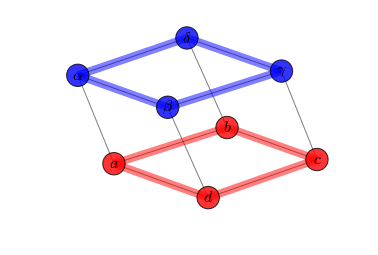

In [69]:
import networkx as nx

G=nx.cubical_graph()
pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=[0,1,2,3],
                       node_color='r',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=[4,5,6,7],
                       node_color='b',
                       node_size=500,
                   alpha=0.8)

# edges
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_edges(G,pos,
                       edgelist=[(0,1),(1,2),(2,3),(3,0)],
                       width=8,alpha=0.5,edge_color='r')
nx.draw_networkx_edges(G,pos,
                       edgelist=[(4,5),(5,6),(6,7),(7,4)],
                       width=8,alpha=0.5,edge_color='b')


# some math labels
labels={}
labels[0]=r'$a$'
labels[1]=r'$b$'
labels[2]=r'$c$'
labels[3]=r'$d$'
labels[4]=r'$\alpha$'
labels[5]=r'$\beta$'
labels[6]=r'$\gamma$'
labels[7]=r'$\delta$'
nx.draw_networkx_labels(G,pos,labels,font_size=16)

plt.axis('off')
plt.savefig("labels_and_colors.png") # save as png
plt.show() # display

In [70]:
## Du graphe à la matrice
